# Salifort Motors Data Science Project - Data Cleaning

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, and they want to analyse this data to build a model that predicts whether or not an employee will leave the company.

In this notebook, I will inspect and clean the data to prepare for further EDA and, and finally, build a model to predict employee attrition.  

## Data Source

The data was sourced from Kaggle, which can be accessed [here](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

In [7]:
# Import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load dataset

df0 = pd.read_csv('../data/HR_comma_sep.csv')

df = df0.copy()

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [19]:
# Rename columns

df.rename(columns={'average_montly_hours':'average_monthly_hours', 
                   'Work_accident':'work_accident', 
                   'Department':'department'}, inplace=True)

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [22]:
# Check for missing values

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [24]:
# Check for duplicates

df.duplicated().sum()

3008

In [26]:
# Drop duplicates

df.drop_duplicates(inplace=True)

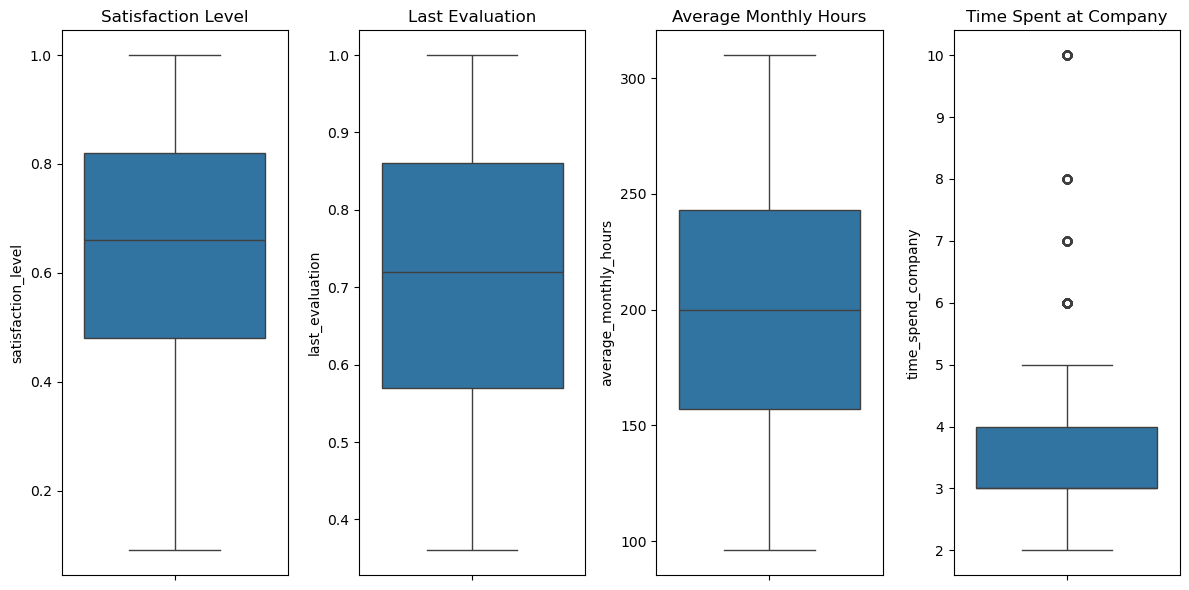

In [30]:
# Check for outliers in data 

num_columns = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'time_spend_company']

fig, axes = plt.subplots(1, 4, figsize=(12, 6))

sns.boxplot(y='satisfaction_level', data=df, ax=axes[0])
axes[0].set_title('Satisfaction Level')

sns.boxplot(y='last_evaluation', data=df, ax=axes[1])
axes[1].set_title('Last Evaluation')

sns.boxplot(y='average_monthly_hours', data=df, ax=axes[2])
axes[2].set_title('Average Monthly Hours')

sns.boxplot(y='time_spend_company', data=df, ax=axes[3])
axes[3].set_title('Time Spent at Company')

plt.tight_layout()
plt.show()